Image data obtained from http://www.vision.caltech.edu/Image_Datasets/Caltech101/

In [1]:
DIR = "F:/data/101_ObjectCategories/"

In [2]:
import sys;sys.path.append("C:/Users/jmenard/learning_smoke/scripts")

In [126]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.transform import resize as imresize 
import skimage.io as skio
import skimage.transform 
import pywt
from sklearn.linear_model import Lasso

In [127]:
os.listdir(DIR)[0:10]

['accordion',
 'airplanes',
 'anchor',
 'ant',
 'BACKGROUND_Google',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai']

In [128]:
DIR_LOC = DIR+"bonsai/"

In [129]:
os.listdir(DIR_LOC)[0:10]

['image_0001.jpg',
 'image_0002.jpg',
 'image_0003.jpg',
 'image_0004.jpg',
 'image_0005.jpg',
 'image_0006.jpg',
 'image_0007.jpg',
 'image_0008.jpg',
 'image_0009.jpg',
 'image_0010.jpg']

In [7]:
len( os.listdir(DIR_LOC) )

128

In [8]:
_img = skio.imread(DIR_LOC+"image_0001.jpg")

In [9]:
print(
    type(_img),
    _img.shape,
    _img.dtype

)

<class 'numpy.ndarray'> (300, 280, 3) uint8


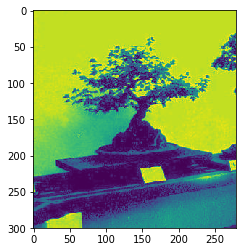

In [84]:
plt.imshow(_img[:,:,0])

In [66]:
_img.shape

(300, 280, 3)

In [113]:
_img_flat = _img[:,:,0].flatten()

In [114]:
_img_flat.shape

(84000,)

In [115]:
# Get fft coefficients:
_s = np.fft.fft(_img_flat)
re_s = np.real(_s)
im_s = np.imag(_s)

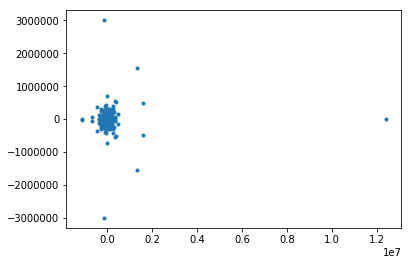

In [116]:
plt.plot(re_s, im_s,linestyle="None",marker=".")

In [117]:
_s_sorted = np.sort(abs(_s))

In [118]:
thresh_5per = _s_sorted[int(0.05*300*280)]

In [119]:
big_idxs = _s > thresh_5per
_s_cut   = np.multiply(_s, big_idxs)

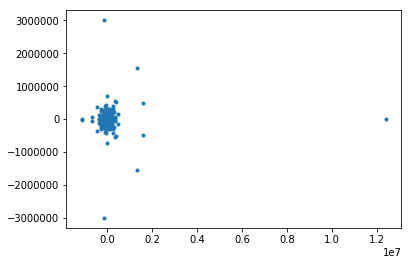

In [120]:
# Get fft coefficients:
_s_cut    = np.fft.fft(_img_flat)
re_s_sort = np.real(_s_cut)
im_s_sort = np.imag(_s_cut)
plt.plot(re_s_sort, im_s_sort,linestyle="None",marker=".")

In [121]:
inv_s = np.fft.ifft(_s_cut)

In [122]:
inv_s.shape

(84000,)

In [123]:
rec_ = inv_s.reshape(300,280)

Text(0.5,1,'Taking top 5% of fourier coefs')

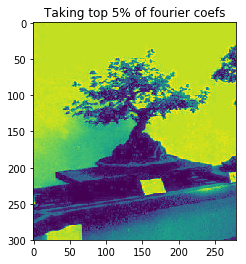

In [124]:
plt.imshow( np.real(rec_) )
plt.title("Taking top 5% of fourier coefs")

Text(0.5,1,'Original')

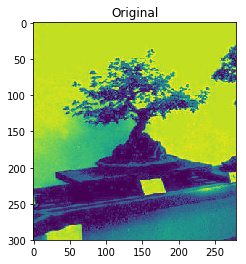

In [125]:
plt.imshow(_img[:,:,0])
plt.title("Original")